In [103]:
import pandas as pd
import numpy as np

orcs = pd.read_csv('orcs_cleaned.csv', index_col=0, encoding='utf-8')
orcs

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region,age_range
orc_id,,,,,,,
2,33,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Кировская область,31-35
3,28,бурят,1,среднее,"Солдаты, матросы, сержанты, старшины",Сахалинская область,26-30
4,26,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край,26-30
5,19,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край,18-20
8,36,русский,1,среднее,Прапорщики и мичманы,Томская область,36-40
...,...,...,...,...,...,...,...
110825,29,русский,0,среднее,"Солдаты, матросы, сержанты, старшины",Республика Адыгея,26-30
110826,37,русский,0,среднее,старшие офицеры,Республика Адыгея,36-40
110828,34,русский,1,среднее,Прапорщики и мичманы,Республика Адыгея,31-35


In [104]:
targets = orcs.age_range
features = orcs.drop(['age'], axis=1)
features = features.drop(['age_range'], axis=1)
#features = pd.get_dummies(features)
features

,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,
2,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Кировская область
3,бурят,1,среднее,"Солдаты, матросы, сержанты, старшины",Сахалинская область
4,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край
5,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край
8,русский,1,среднее,Прапорщики и мичманы,Томская область
...,...,...,...,...,...
110825,русский,0,среднее,"Солдаты, матросы, сержанты, старшины",Республика Адыгея
110826,русский,0,среднее,старшие офицеры,Республика Адыгея
110828,русский,1,среднее,Прапорщики и мичманы,Республика Адыгея


In [105]:
from sklearn.preprocessing import LabelEncoder

orcs_encoded= orcs
lables = orcs_encoded.columns
size = len(lables)
for i in range(size):
    orcs_encoded[lables[i]]= LabelEncoder().fit_transform(orcs_encoded[lables[i]])   
orcs_encoded

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region,age_range
orc_id,,,,,,,
2,15,16,1,1,1,21,3
3,10,5,1,1,1,65,2
4,8,16,1,1,1,42,2
5,1,16,1,1,1,42,0
8,18,16,1,1,0,71,4
...,...,...,...,...,...,...,...
110825,11,16,0,1,1,44,2
110826,19,16,0,1,4,44,4
110828,16,16,1,1,0,44,3


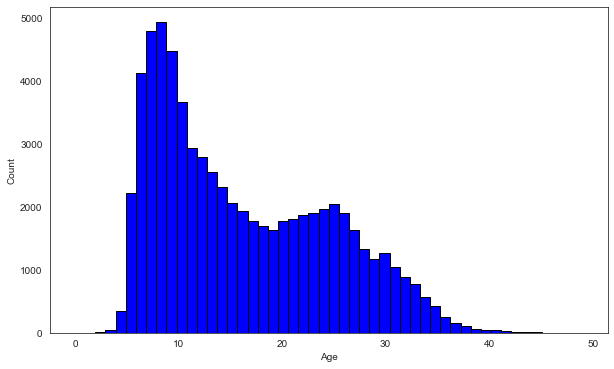

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(orcs_encoded.age, bins=50, ec='black', color='b')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


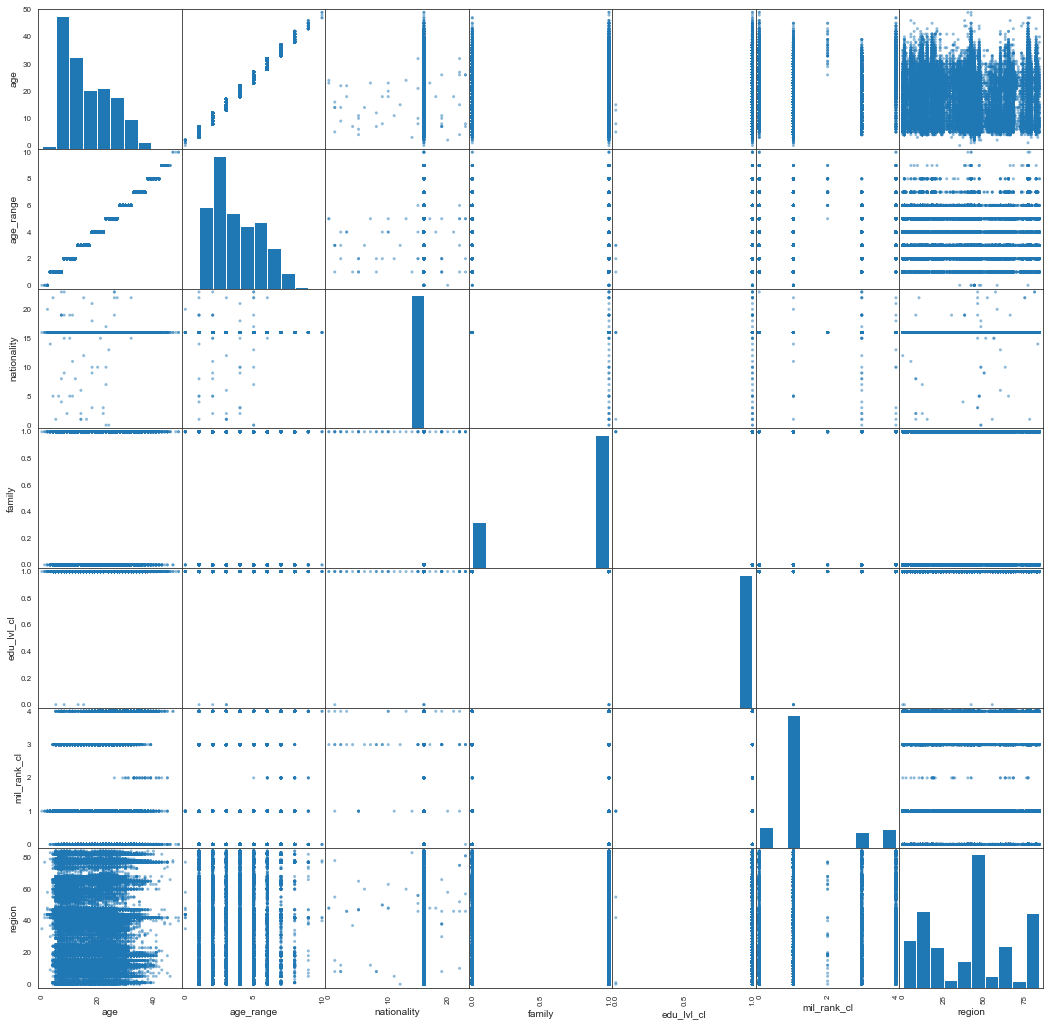

In [107]:
pd.plotting.scatter_matrix(orcs_encoded[['age','age_range', 'nationality', 'family', 'edu_lvl_cl',  'mil_rank_cl', 'region']], figsize=(18,18))
print("")


In [108]:
orcs_encoded

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region,age_range
age,1.000000,0.003350,-0.000339,0.005214,0.316940,0.037181,0.986623
nationality,0.003350,1.000000,-0.007489,0.118146,-0.017345,0.004776,0.002357
family,-0.000339,-0.007489,1.000000,-0.004524,0.004894,-0.002186,-0.001175
edu_lvl_cl,0.005214,0.118146,-0.004524,1.000000,0.002437,0.004799,0.004195
mil_rank_cl,0.316940,-0.017345,0.004894,0.002437,1.000000,0.015405,0.310337
region,0.037181,0.004776,-0.002186,0.004799,0.015405,1.000000,0.037455
age_range,0.986623,0.002357,-0.001175,0.004195,0.310337,0.037455,1.000000


In [109]:
mask = np.zeros_like(orcs_encoded.corr())
triangle_indeces = np.triu_indices_from(mask)
mask[triangle_indeces] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

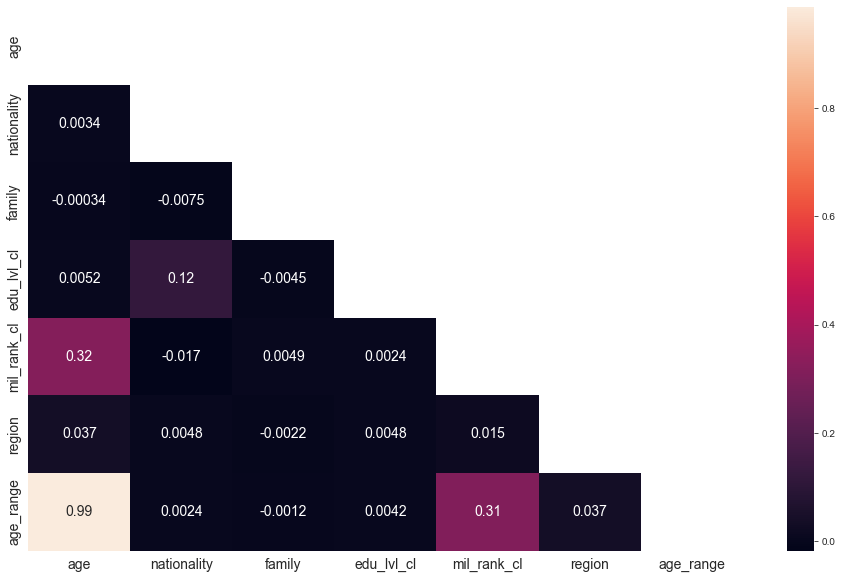

In [110]:
import seaborn as sns

Mask = np.zeros_like(orcs_encoded.corr())
triangle_indeces = np.triu_indices_from(Mask)
Mask[triangle_indeces] = True

plt.figure(figsize=(16,10))
sns.heatmap(orcs_encoded.corr(), mask=Mask, annot = True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [111]:
targets = orcs_encoded.age_range
features = orcs_encoded
features = features.drop(['age_range'], axis=1)
features = features.drop(['age'], axis=1)

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=42)

                            OLS Regression Results                            
Dep. Variable:              age_range   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1080.
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:23:46   Log-Likelihood:                -97211.
No. Observations:               50582   AIC:                         1.944e+05
Df Residuals:                   50576   BIC:                         1.945e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8297      1.270      1.440      

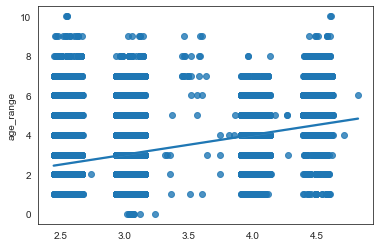

In [113]:
import statsmodels.api as sm
X_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, X_incl_const)
result= model.fit()
print(result.summary())
r=result.predict(X_incl_const)
r=np.array(result)
sns.regplot(result.fittedvalues.copy(), y_train)
plt.show()

In [114]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()

pd.DataFrame({'coef': result.params, 'p-values': round(result.pvalues,3)})

,coef,p-values
const,1.829716,0.150
nationality,0.040910,0.187
family,-0.024615,0.144
edu_lvl_cl,-0.017337,0.988
mil_rank_cl,0.488178,0.000
region,0.002426,0.000


Бачимо, що p-values у колонок nationality, family, та edu_lvl_cl - завелике. Перевіримо на мультиколеніарність

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx = i) for i in range(x_incl_const.shape[1])]

pd.DataFrame({'coef_name': x_incl_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,29853.89
1,nationality,1.00
2,family,1.00
3,edu_lvl_cl,1.00
4,mil_rank_cl,1.00
5,region,1.00


Всі дані мають vif < 5, тому спробуємо побудувати модель використовуючи BIC

In [116]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()    

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 194487.38563219906
R-squared: 0.09646848002734065


Спробуємо по черзі прибирати поля що мають великий P-value

In [117]:
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['nationality'], axis=1)

model = sm.OLS(y_train, x_incl_const)
result = model.fit() 

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 194478.29527061697
R-squared: 0.09643738070462549


In [118]:
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['nationality', 'family'], axis=1)

model = sm.OLS(y_train, x_incl_const)
result = model.fit() 

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 194469.62832918367
R-squared: 0.09639871632847008


результат покращився, але незначно :( Залишимо як і було.

In [119]:
from sklearn.model_selection import learning_curve 

def plot_learning_curve(model, title, X, y, ylim=None, cv=None, n_jobs=1):
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

lables = features.columns

length = len(lables)

features = StandardScaler().fit_transform(features)
norm_features = normalize(features)

In [121]:
regression_results = pd.DataFrame(columns = ['method', 'train_score', 'test_score', 'training_time'])

<module 'matplotlib.pyplot' from 'd:\\Programms\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

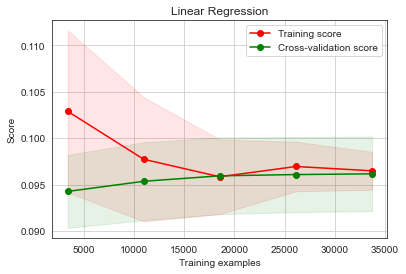

In [122]:
from sklearn.linear_model import LinearRegression
import time

t_start = time.perf_counter()
model = LinearRegression().fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
train_score = model.score(x_train, y_train)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Linear Regression', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)
pd.DataFrame(data=model.coef_, index = lables, columns=['coef'])
plot_learning_curve(model, 'Linear Regression', x_train, y_train, cv=3, n_jobs=3)


<module 'matplotlib.pyplot' from 'd:\\Programms\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

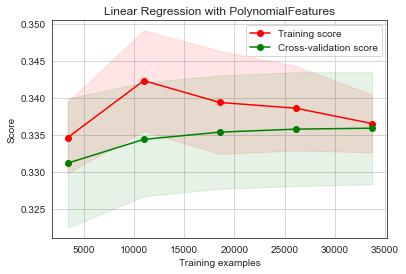

In [123]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import make_pipeline
import sys


params_dict = {
    'params':[
        {
        "degree": [2, 3, 4, 5],
        }
    ]
}   
grid = GridSearchCV(PolynomialFeatures(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()                    
grid = make_pipeline(grid, LinearRegression()).fit(x_train, y_train) 
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
test_score = model.score(x_test, y_test)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Linear Regression with Polynomial Features', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)

plot_learning_curve(model, 'Linear Regression with Polynomial Features', x_train, y_train, cv=3, n_jobs=3)

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

params_dict = {
    'params':[
        {
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "min_samples_split": np.linspace(0.1, 0.5, 12),
        "min_samples_leaf": np.linspace(0.1, 0.5, 12),
        "max_depth": [3, 5, 8],
        "max_features": ["log2", "sqrt"],
        "alpha": [0, 0.3, 0.5, 0.7, 1.0],
        "subsample": [0.5, 0.7, 0.9, 1.0],
        "n_estimators": [50, 100, 150, 200]
        }
    ]
}   

grid = GridSearchCV(GradientBoostingRegressor(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()                            
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
test_score = model.score(x_test, y_test)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Gradient Boosting Regressor', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)

plot_learning_curve(model, 'Gradient Boosting Regressor', x_train, y_train, cv=3, n_jobs=3)

ValueError: Loss 'squared_error' not supported. 

In [ ]:
from sklearn.linear_model import LogisticRegression
params_dict = {
    'params':[
        {
        "C": np.logspace(-3, 3, 7), 
        "penalty": ["l1", "l2"] # l1 lasso l2 ridge
        }
    ]
}

grid = GridSearchCV(LogisticRegression(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
test_score = model.score(x_test, y_test)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Logistic Regression', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)

plot_learning_curve(model, 'Logistic Regression', x_train, y_train, cv=3, n_jobs=3)


In [ ]:
from sklearn.linear_model import ElasticNet

params_dict = {
    'params':[
        {
        "alpha": [0, 0.3, 0.5, 0.7, 1.0], 
        "l1_ratio": [0, 0.3, 0.5, 0.7, 1.0]
        }
    ]
}

grid = GridSearchCV(ElasticNet(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
test_score = model.score(x_test, y_test)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Elastic Net Regression', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)

plot_learning_curve(model, 'Elastic Net Regression', x_train, y_train, cv=3, n_jobs=3)


In [ ]:
from sklearn.linear_model import SGDRegressor

params_dict = {
    'params':[
        {
        "penalty": ['l2', 'l1', 'elasticnet'], 
        "l1_ratio": [0, 0.3, 0.5, 0.7, 1.0]
        }
    ]
}

grid = GridSearchCV(SGDRegressor(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
test_score = model.score(x_test, y_test)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'SGD Regressor', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)

plot_learning_curve(model, 'SGD Regressor', x_train, y_train, cv=3, n_jobs=3)



In [125]:
regression_results

,method,train_score,test_score,training_time
0,Linear Regression,0.096468,0.100063,0.007682
1,Linear Regression with PolynomialFeatures,0.096468,0.346670,0.664767
